## IBM HR Analytics Employee Attrition & Performance Exploratory Data Analysis

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

%matplotlib inline

In [2]:
# Importing the data

df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Data types, Column names and Nulls

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Null Value Sums

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Descriptive Statistics

In [5]:
# Descriptive statistics for continuous variables

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Descriptive statistics for categorical variables

df.describe(include="object")[["Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,1233,1043,961,606,882,326,673


### Distribution Graphs

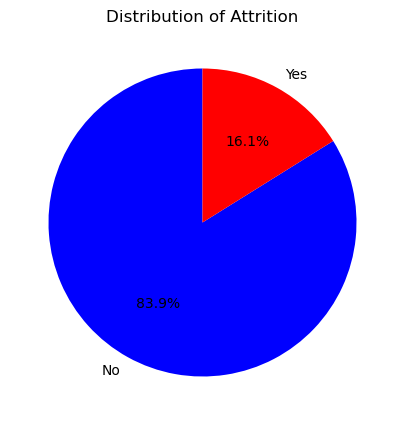

In [7]:
# Distribution of Attrition
plt.figure(figsize=(10, 5))
df["Attrition"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=["blue", "red"])
plt.title("Distribution of Attrition")
plt.ylabel("")
plt.show()

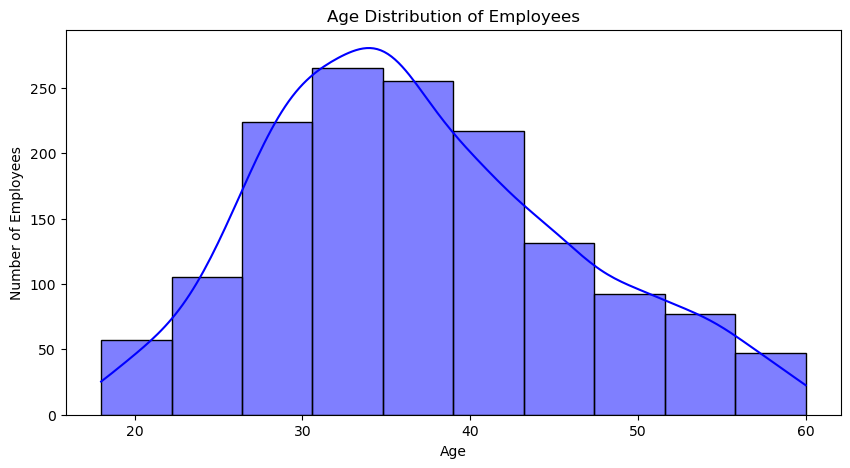

In [8]:
# Age Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=10, kde=True, color="#0000FF", edgecolor="black")
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

### Correlation Heatmap

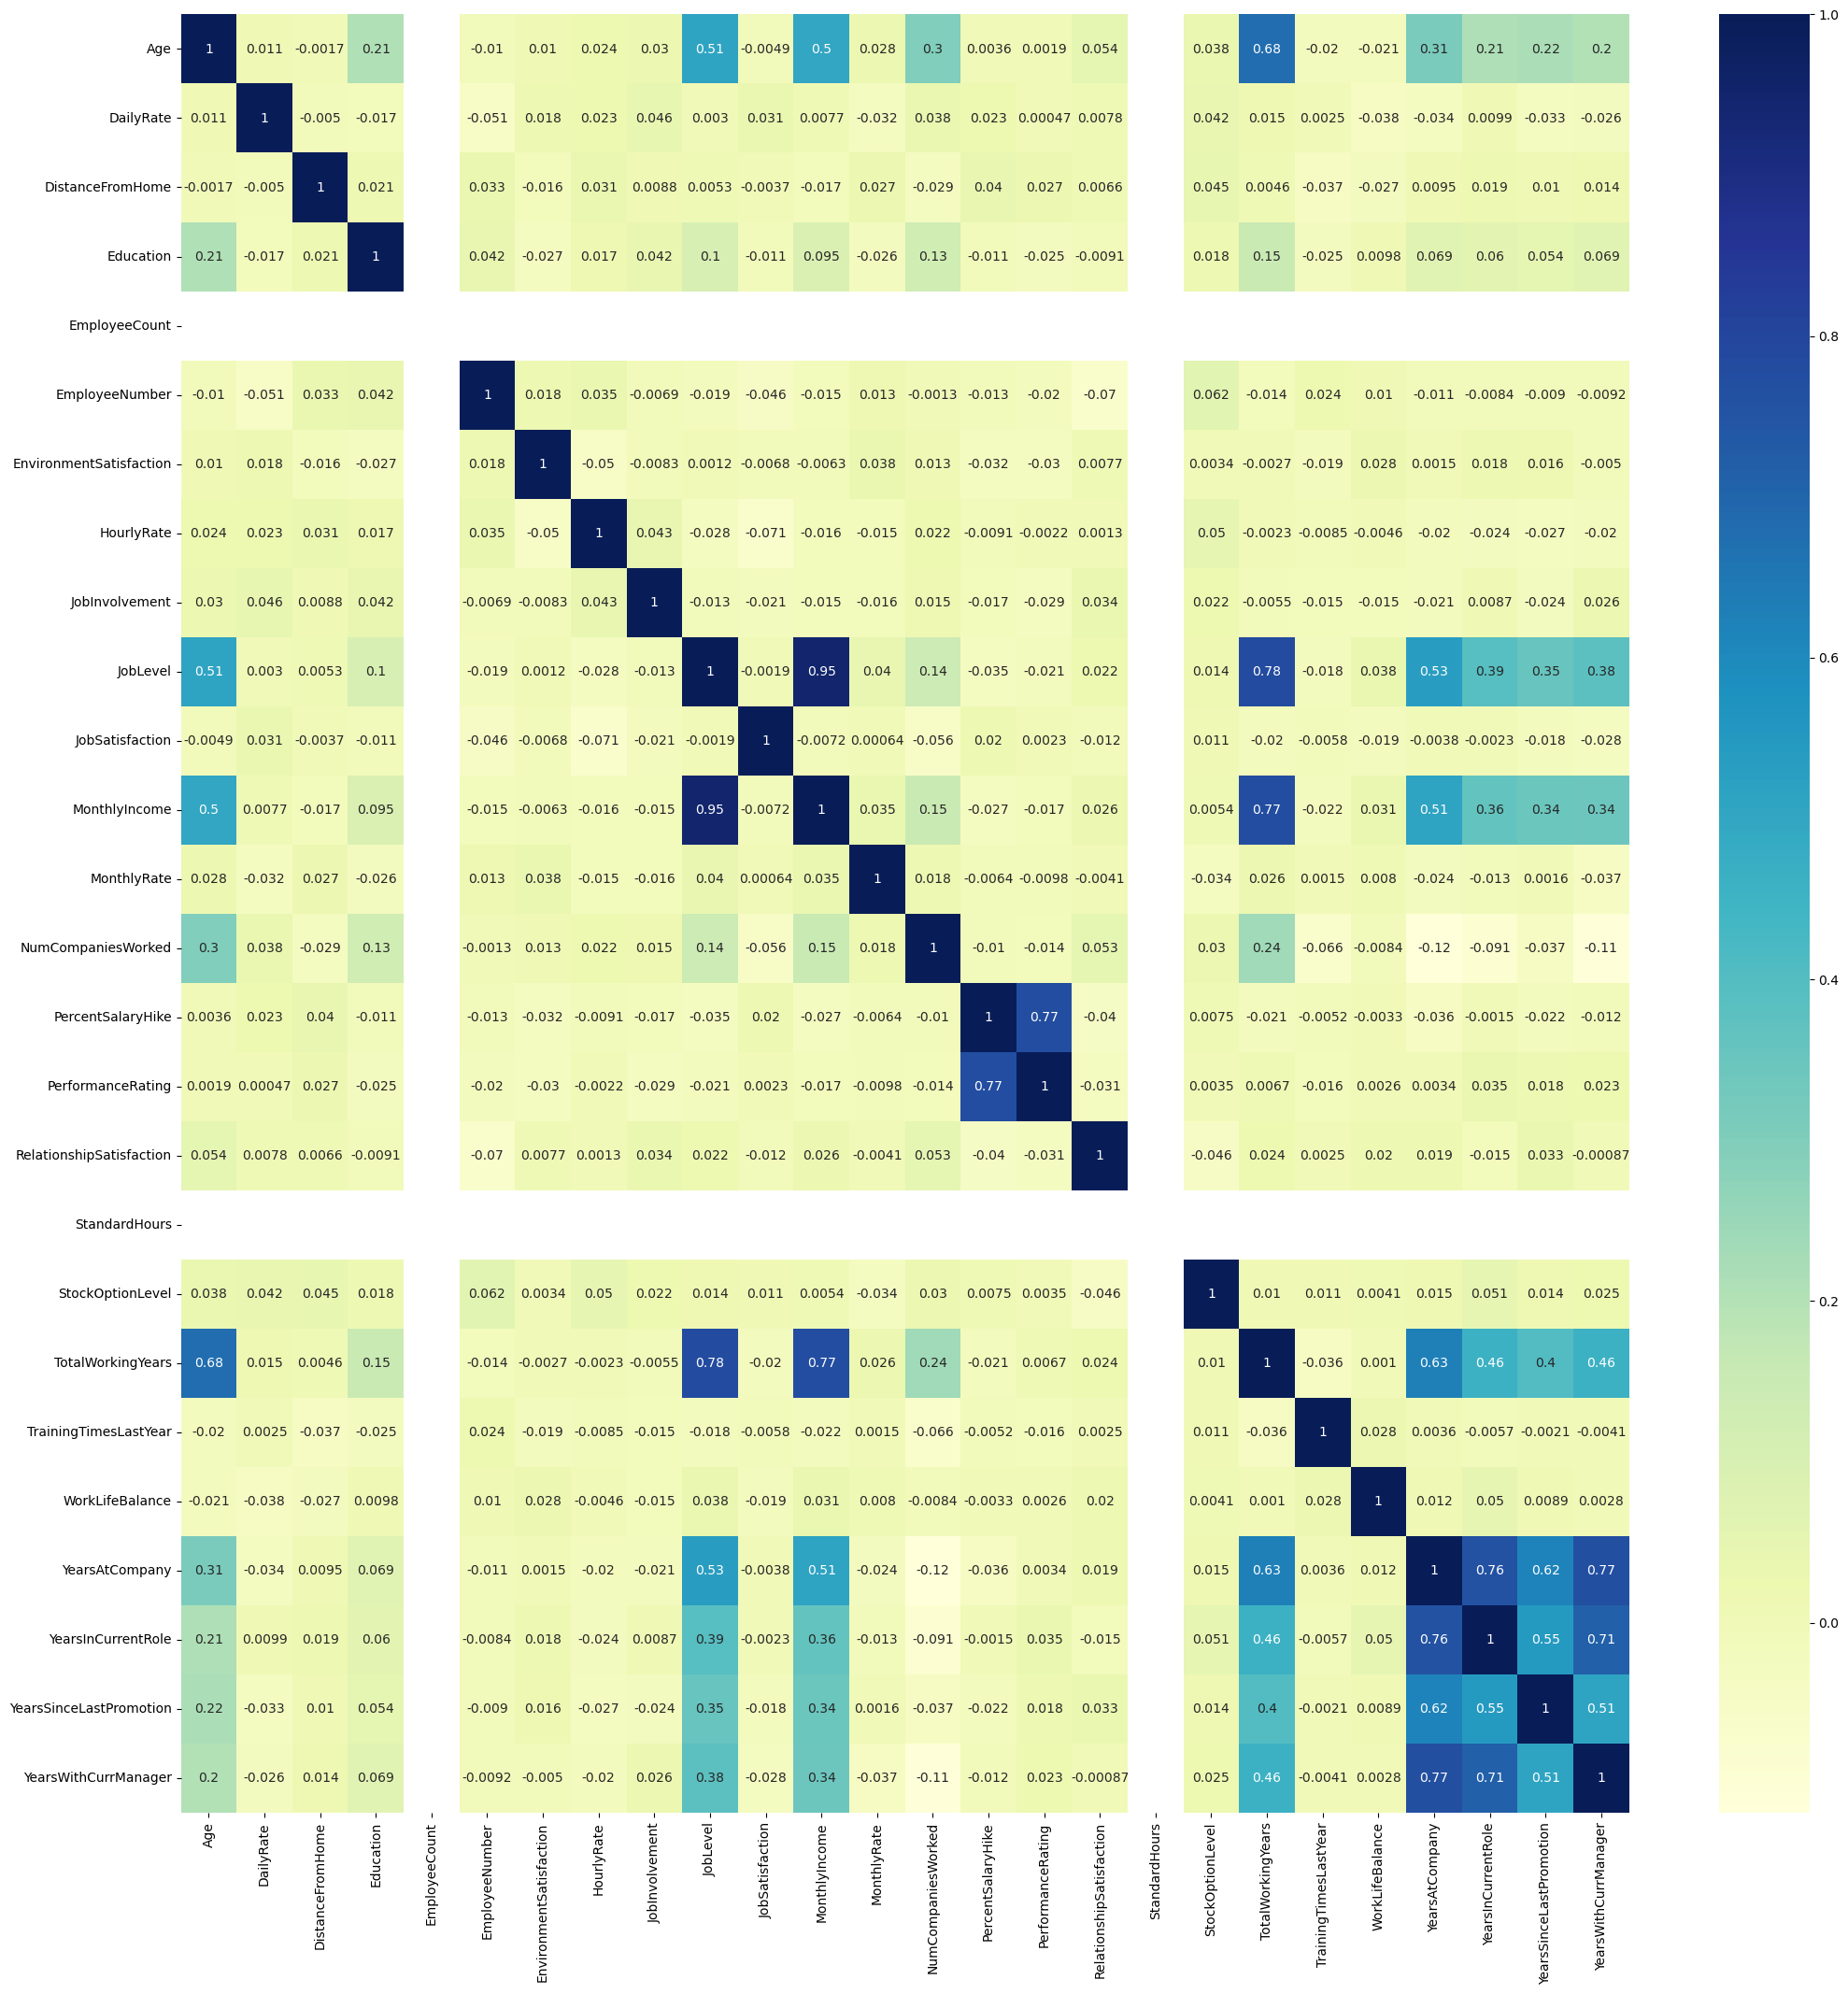

In [9]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

### Attrition by Gender

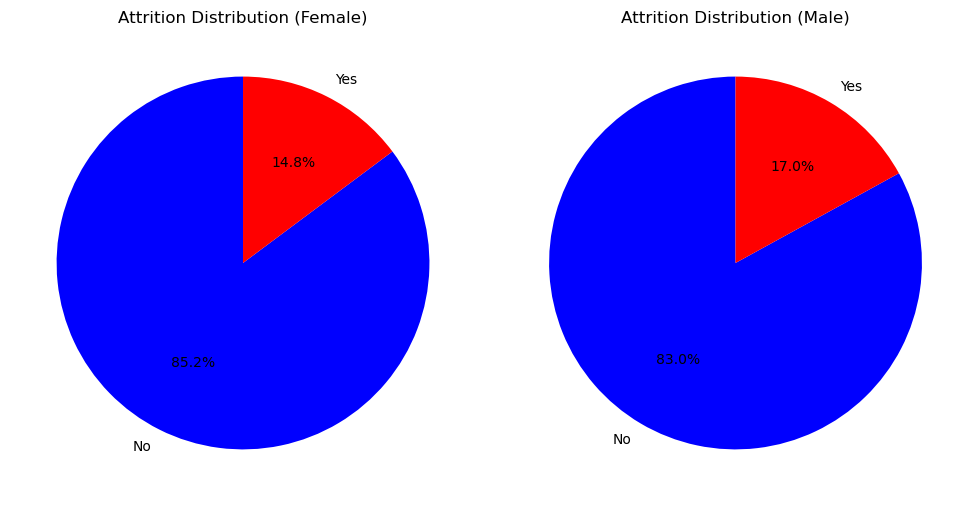

In [10]:
gender_attrition = df.groupby("Gender")["Attrition"].value_counts()

plt.figure(figsize=(10, 5))

# Female Attrition Distribution Pie Chart
plt.subplot(1, 2, 1)
gender_attrition.loc["Female"].plot.pie(autopct="%1.1f%%", startangle=90, colors=["blue", "red"])
plt.title("Attrition Distribution (Female)")
plt.ylabel("")

# Male Attrition Distribution Pie Chart
plt.subplot(1, 2, 2)
gender_attrition.loc["Male"].plot.pie(autopct="%1.1f%%", startangle=90, colors=["blue", "red"])
plt.title("Attrition Distribution (Male)")
plt.ylabel("")

plt.tight_layout()
plt.show()

### Attrition by Department

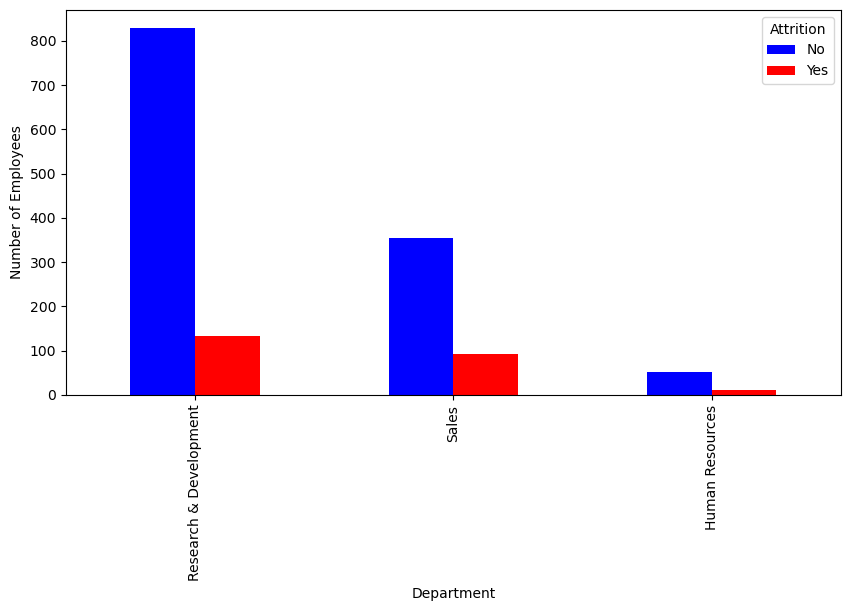

In [11]:
department_attrition = df.groupby("Department")["Attrition"].value_counts().unstack()
department_attrition = department_attrition.sort_values("Yes", ascending=False)
department_attrition.plot.bar(color=["blue", "red"], figsize=(10, 5))
plt.ylabel("Number of Employees")
plt.show()

### Attrition by Job Title

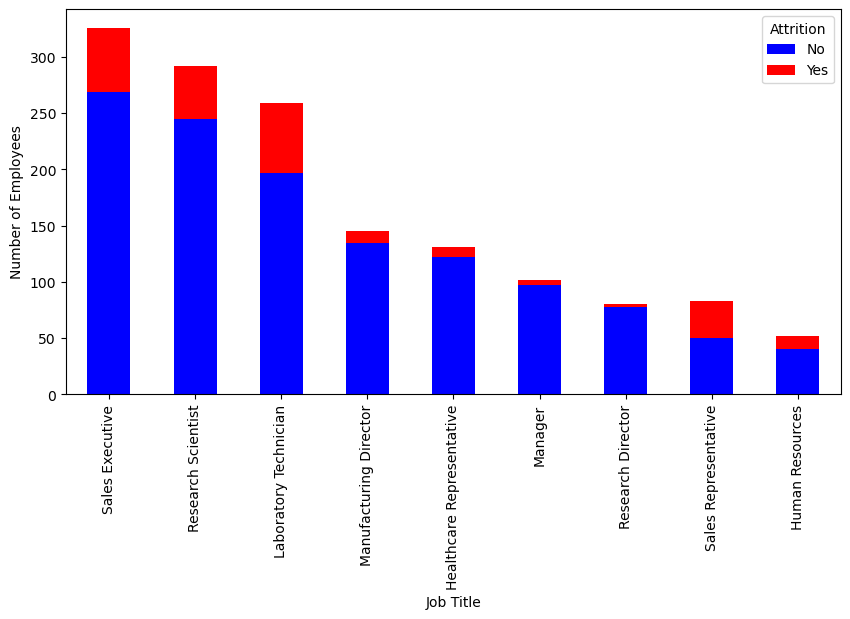

In [12]:
jobtitle_attrition = df.groupby("JobRole")["Attrition"].value_counts().unstack()
jobtitle_attrition = jobtitle_attrition.sort_values("No", ascending=False)
jobtitle_attrition.plot.bar(stacked=True, color=["blue", "red"], figsize=(10, 5))
plt.xlabel("Job Title")
plt.ylabel("Number of Employees")
plt.show()

### Distribution of Age by Department and Attrition

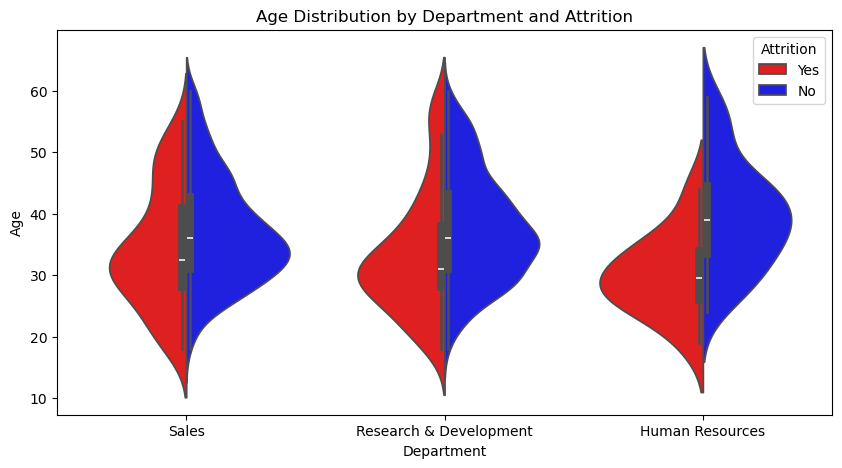

In [13]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="Department", y="Age", hue="Attrition", data=df, split=True, palette={"No": "blue", "Yes": "Red"})
plt.title("Age Distribution by Department and Attrition")
plt.xlabel("Department")
plt.ylabel("Age")
plt.legend(title="Attrition")
plt.show()

### Income and Raise Percentage vs Attrition

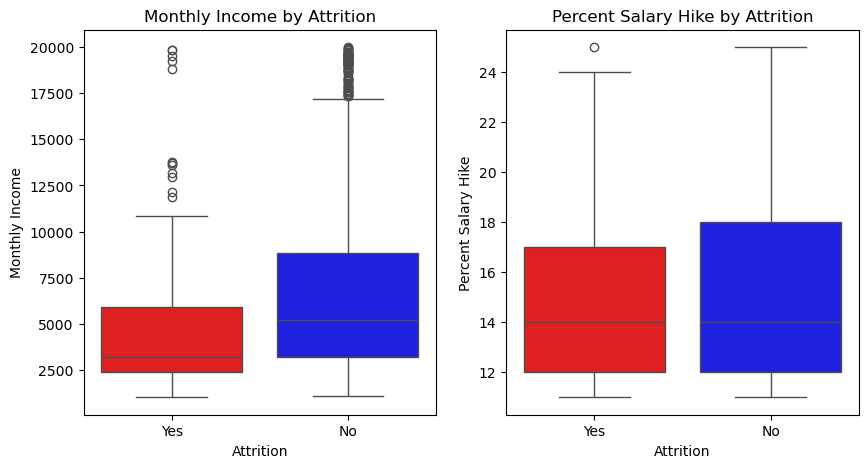

In [14]:
plt.figure(figsize=(10, 5))

# Monthly Income vs Attrition Graph
plt.subplot(1, 2, 1)
sns.boxplot(x="Attrition", y="MonthlyIncome", hue= "Attrition", data=df, palette={"No": "blue", "Yes": "red"})
plt.title("Monthly Income by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")

# Salary Hike vs Attrition Graph
plt.subplot(1, 2, 2)
sns.boxplot(x="Attrition", y="PercentSalaryHike", hue= "Attrition", data=df, palette={"No": "blue", "Yes": "red"})
plt.title("Percent Salary Hike by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Percent Salary Hike")

plt.show()

### Satisfaction Levels and Attrition

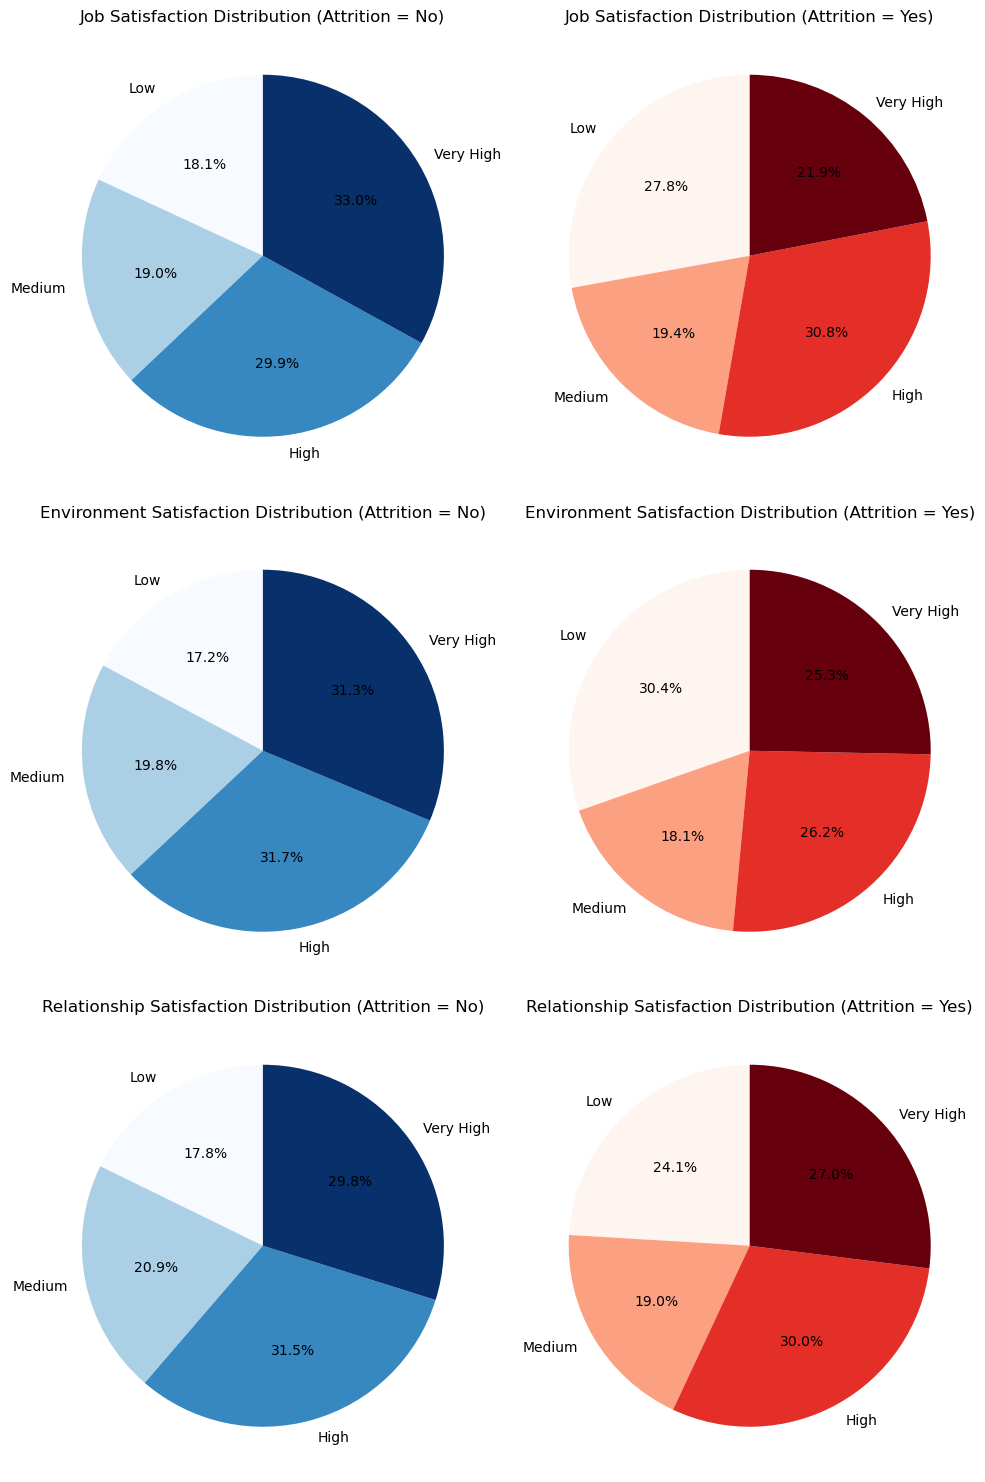

In [15]:
job_sat_percent = df.groupby("Attrition")["JobSatisfaction"].value_counts().unstack()
job_sat_percent = job_sat_percent.rename(columns={1 : "Low", 2 : "Medium", 3 : "High", 4: "Very High"})

env_sat_percent = df.groupby("Attrition")["EnvironmentSatisfaction"].value_counts().unstack()
env_sat_percent = env_sat_percent.rename(columns={1 : "Low", 2 : "Medium", 3 : "High", 4: "Very High"})

rel_sat_percent = df.groupby("Attrition")["RelationshipSatisfaction"].value_counts().unstack()
rel_sat_percent = rel_sat_percent.rename(columns={1 : "Low", 2 : "Medium", 3 : "High", 4: "Very High"})

plt.figure(figsize=(10, 15))

# Job satisfaction for Attrition = "No"
plt.subplot(3, 2, 1)
job_sat_percent.loc["No"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Blues")
plt.title("Job Satisfaction Distribution (Attrition = No)")
plt.ylabel("")

# Job satisfaction for Attrition = "Yes"
plt.subplot(3, 2, 2)
job_sat_percent.loc["Yes"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Reds")
plt.title("Job Satisfaction Distribution (Attrition = Yes)")
plt.ylabel("")

# Environment satisfaction for Attrition = "No"
plt.subplot(3, 2, 3)
env_sat_percent.loc["No"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Blues")
plt.title("Environment Satisfaction Distribution (Attrition = No)")
plt.ylabel("")

# Environment satisfaction for Attrition = "Yes"
plt.subplot(3, 2, 4)
env_sat_percent.loc["Yes"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Reds")
plt.title("Environment Satisfaction Distribution (Attrition = Yes)")
plt.ylabel("")

# Relationship satisfaction for Attrition = "No"
plt.subplot(3, 2, 5)
rel_sat_percent.loc["No"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Blues")
plt.title("Relationship Satisfaction Distribution (Attrition = No)")
plt.ylabel("")

# Relationship satisfaction for Attrition = "Yes"
plt.subplot(3, 2, 6)
rel_sat_percent.loc["Yes"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Reds")
plt.title("Relationship Satisfaction Distribution (Attrition = Yes)")
plt.ylabel("")
plt.tight_layout()
plt.show()

### Time and Attrition

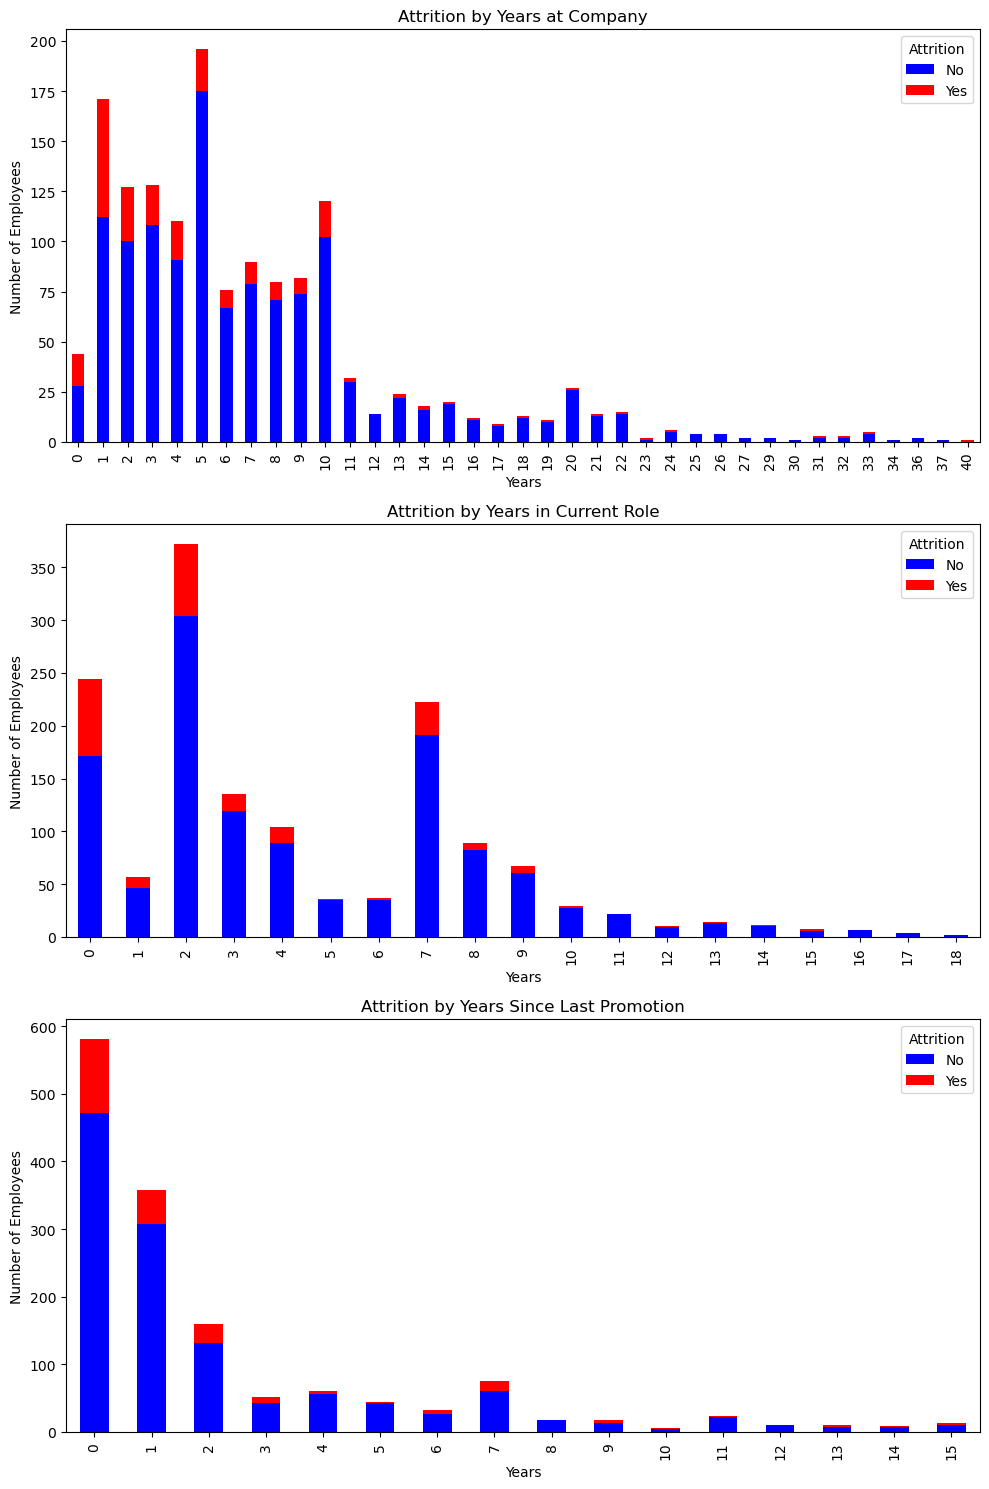

In [16]:
years_at_company = df.groupby("YearsAtCompany")['Attrition'].value_counts().unstack()
years_in_role = df.groupby("YearsInCurrentRole")['Attrition'].value_counts().unstack()
years_since_promotion = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts().unstack()

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Attrition Years at the Company
years_at_company.plot(kind="bar", stacked=True, color=["blue", "red"], ax=axes[0])
axes[0].set_title("Attrition by Years at Company")
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Number of Employees")

# Attrition by Years in Current Role
years_in_role.plot(kind="bar", stacked=True, color=["blue", "red"], ax=axes[1])
axes[1].set_title("Attrition by Years in Current Role")
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Number of Employees")

# Attrition by Years Since Last Promotion
years_since_promotion.plot(kind="bar", stacked=True, color=["blue", "red"], ax=axes[2])
axes[2].set_title("Attrition by Years Since Last Promotion")
axes[2].set_xlabel("Years")
axes[2].set_ylabel("Number of Employees")

plt.tight_layout()
plt.show()

### Work-Life Balance and Working Hours

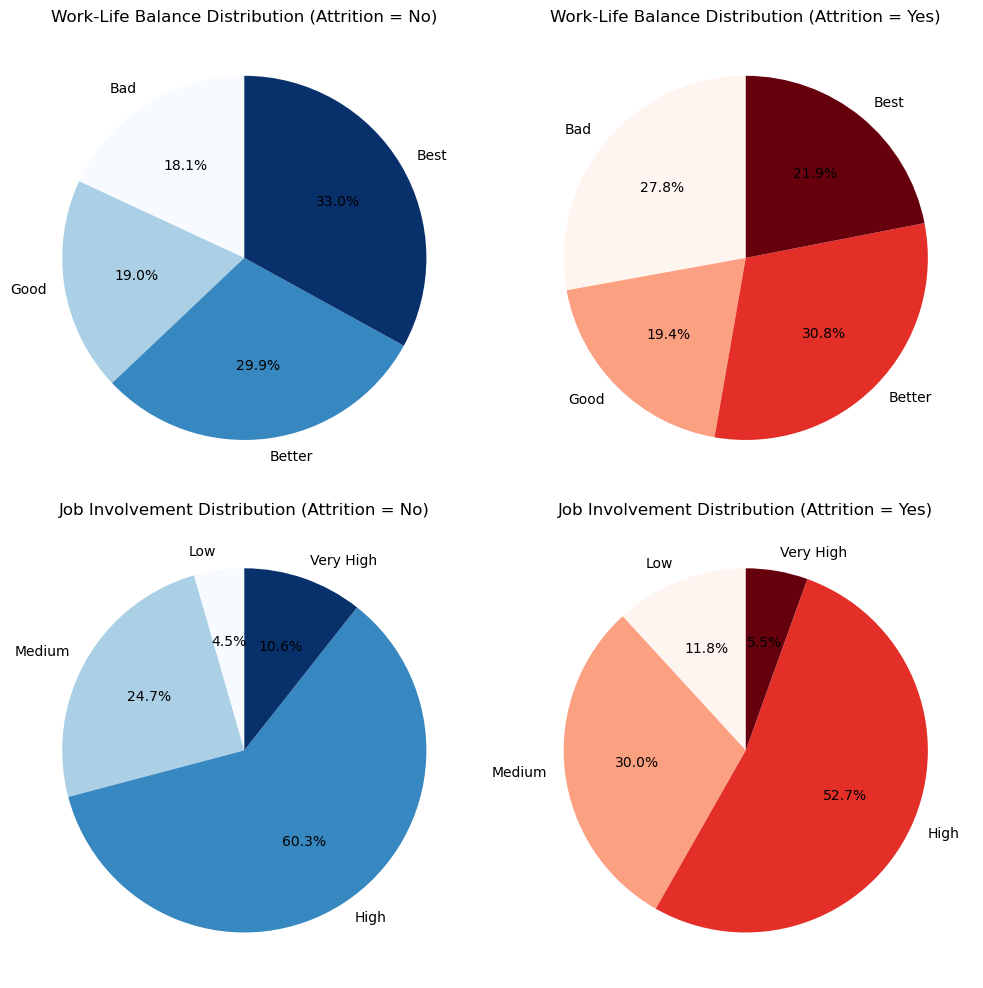

In [17]:
work_life_percent = df.groupby("Attrition")["JobSatisfaction"].value_counts().unstack()
work_life_percent = work_life_percent.rename(columns={1 : "Bad", 2 : "Good", 3 : "Better", 4: "Best"})

job_inv_percent = df.groupby("Attrition")["JobInvolvement"].value_counts().unstack()
job_inv_percent = job_inv_percent.rename(columns={1 : "Low", 2 : "Medium", 3 : "High", 4: "Very High"})

plt.figure(figsize=(10, 10))
# Work Life Balance for Attrition = "No"
plt.subplot(2, 2, 1)
work_life_percent.loc["No"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Blues")
plt.title("Work-Life Balance Distribution (Attrition = No)")
plt.ylabel("")

# Work Life Balance for Attrition = "No"
plt.subplot(2, 2, 2)
work_life_percent.loc["Yes"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Reds")
plt.title("Work-Life Balance Distribution (Attrition = Yes)")
plt.ylabel("")

# Job Involvement for Attrition = "No"
plt.subplot(2, 2, 3)
job_inv_percent.loc["No"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Blues")
plt.title("Job Involvement Distribution (Attrition = No)")
plt.ylabel("")

# Job Involvement for Attrition = "Yes"
plt.subplot(2, 2, 4)
job_inv_percent.loc["Yes"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="Reds")
plt.title("Job Involvement Distribution (Attrition = Yes)")
plt.ylabel("")

plt.tight_layout()
plt.show()

### Distance from Home and Business Travel

C:\Users\Utku\AppData\Local\Temp\ipykernel_23284\3807309293.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rarely", "Frequently", "Never"])


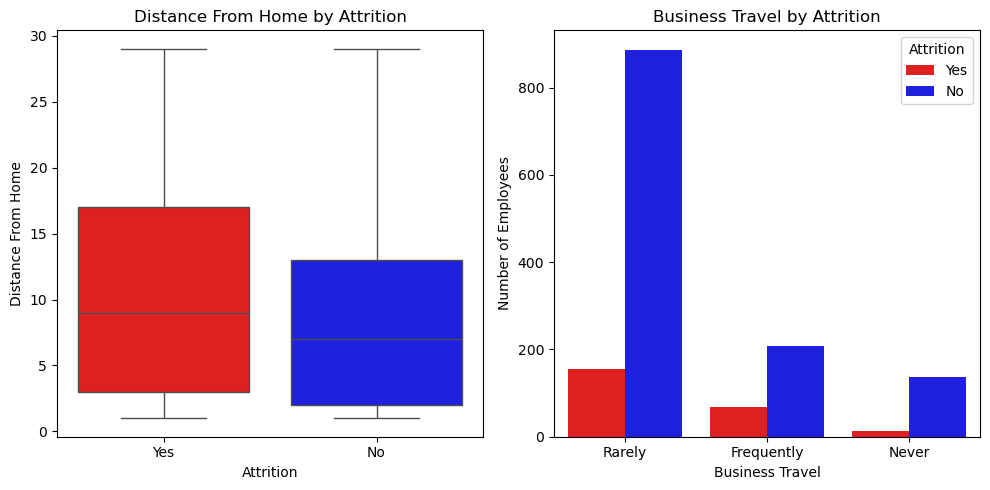

In [18]:
plt.figure(figsize=(10, 5))

# Distance from Home
plt.subplot(1, 2, 1)
sns.boxplot(x="Attrition", y="DistanceFromHome", hue= "Attrition", data=df, palette={"No": "blue", "Yes": "red"})
plt.title("Distance From Home by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Distance From Home")

# Business Travel
plt.subplot(1, 2, 2)
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=df, palette={"No": "blue", "Yes": "red"})
ax.set_xticklabels(["Rarely", "Frequently", "Never"])
plt.title("Business Travel by Attrition")
plt.xlabel("Business Travel")
plt.ylabel("Number of Employees")
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()